In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder # for train test splitting
from sklearn.model_selection import train_test_split #for secision tree object
from sklearn.tree import DecisionTreeClassifier # for checking testing results
from sklearn.metrics import classification_report, confusion_matrix # for visualizing tree
from sklearn.tree import plot_tree

In [2]:
#Reading the data
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.shape

(150, 5)

In [5]:
iris.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

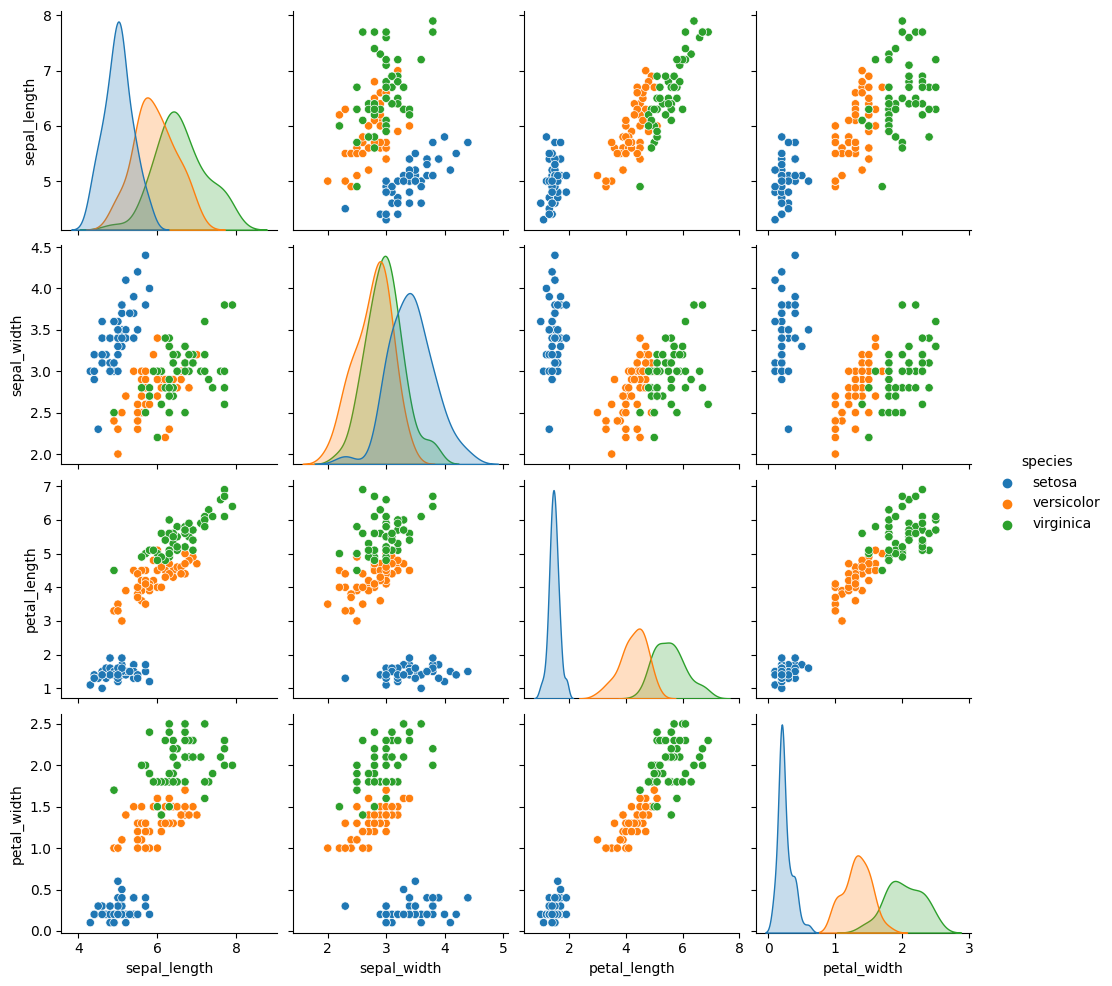

In [6]:
#Lets plot pair plot to visualize the attributes all at once
sns.pairplot(data=iris, hue= 'species')

In [7]:
#Now we will separate the target variable(y) and features (x) as follows 

target = iris['species'] #to preditct # dependant variable
df1 = iris.copy()
df1 = df1.drop('species', axis = 1)  #drop species and contain column other than species

In [8]:
x = df1  #independant variable

In [9]:
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [10]:
#Label encoding as target variable is catergorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(target)
target   #label species so that machine can understand.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
y = target

In [12]:
#Spliting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)  # x - dependant y-independant

In [13]:
#Defining the decision tree algorithamtree = DecisionTreeClassifier()
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print('Decision tree classfier created')

#dtree.fit(X_train, y_train): This line trains the decision tree classifier using the fit() method. 
#It takes the training set of feature variables (X_train) and the corresponding target variables (y_train) as input.
#The classifier learns from this data to make predictions.

Decision tree classfier created


In [14]:
#Predicting the values of test data
from sklearn.metrics import classification_report
y_pred = dtree.predict(X_test)
print("Classification report = \n", classification_report(y_test, y_pred))

#unction, which is used to evaluate the performance of a classification model by computing various metrics such as precision, recall, F1-score, and support.

Classification report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89         5
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



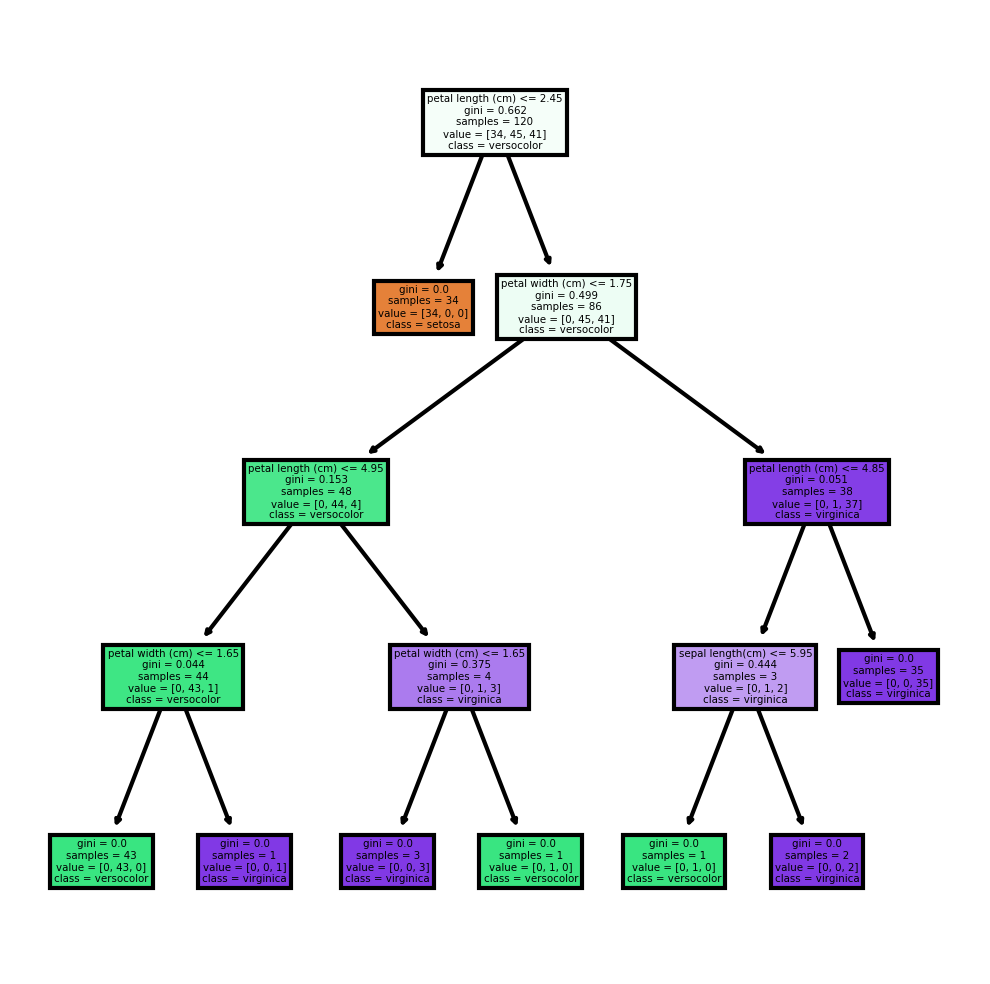

In [17]:
from sklearn import tree
fn=['sepal length(cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versocolor', 'virginica']
fig, axes = plt.subplots(nrows =  1, ncols =1, figsize = (4,4), dpi = 300)
tree.plot_tree(dtree,feature_names =fn, class_names = cn, filled =True);
fig.savefig('imagename.png')

#The fn list contains the names of the features, and the cn list contains the names of the classes.
#The tree.plot_tree() function is used to visualize the decision tree. It takes the trained decision tree (dtree) as input, along with the feature names (fn), class names (cn), and the filled parameter set to True for filled nodes in the plot.